### **Análisis de las ventas de videojuegos en el año 2024**

En el siguiente notebook se realiza una limpieza y posterior análisis de los datos de ventas de videojuegos en el año 2024. 

El dataset utilizado se encuentra disponible en kaggle

Bayne Brannen, and Asaniczka. (2024). Video Game Sales 2024 [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/7507070

### **1. Importación del dataset**

En esta sección de importan las librerias necesarias y se carga el dataset

In [1]:
# importacion de las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importacion de los datos y conversion a dataframe
vg = pd.read_csv('../data/vgchartz-2024.csv')
print(vg.head(10))

                                                 img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
5  /games/boxart/full_call-of-duty-modern-warfare...   
6  /games/boxart/full_call-of-duty-black-ops_5Ame...   
7      /games/boxart/full_4653215AmericaFrontccc.jpg   
8      /games/boxart/full_1977964AmericaFrontccc.jpg   
9      /games/boxart/full_4649679AmericaFrontccc.png   

                            title console             genre       publisher  \
0              Grand Theft Auto V     PS3            Action  Rockstar Games   
1              Grand Theft Auto V     PS4            Action  Rockstar Games   
2     Grand Theft Auto: Vice City     PS2            Action  Rockstar Games   
3              Grand Theft Auto V    X360            Action  Rockst

In [3]:
# identificacion de las ultimas filas del dataframe
print(vg.tail(5))

                                                 img  \
64011  /games/boxart/full_2779838AmericaFrontccc.jpg   
64012  /games/boxart/full_8031506AmericaFrontccc.jpg   
64013  /games/boxart/full_6553045AmericaFrontccc.jpg   
64014    /games/boxart/full_6012940JapanFrontccc.png   
64015                      /games/boxart/default.jpg   

                                  title console         genre  \
64011             XBlaze Lost: Memories      PC  Visual Novel   
64012                      Yoru, Tomosu     PS4  Visual Novel   
64013                      Yoru, Tomosu      NS  Visual Novel   
64014   Yunohana SpRING! ~Mellow Times~      NS  Visual Novel   
64015  Yurukill: The Calumniation Games     PS4  Visual Novel   

                  publisher             developer  critic_score  total_sales  \
64011           Aksys Games      Arc System Works           NaN          NaN   
64012  Nippon Ichi Software  Nippon Ichi Software           NaN          NaN   
64013  Nippon Ichi Software  Nip

In [4]:
# informacion del dataframe
print(vg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None


### **2. Limpieza del dataframe**

En esta sección del notebook, se procede a realizar una limpieza de los datos. 

Los procesos realizados son: identificar columnas innecesarias para el análisis, identificar los valores únicos, cambiar los tipos de datos objeto al tipo correcto, identificar valores nulos y rellenar datos faltantes en caso de ser necesario

### **2.1. Identificación de columnas innecesarias**

Se observa que el dataset contiene una columna con la url de la imagen de cada videojuego. Como el análisis a realizar es estadístico, se creará otro dataset y la columna con urls será eliminada, ya que no se identifica que sea de propósito para el análisis 

In [5]:
# nuevo dataset
vg_sales = vg

# shape del dataframe
print("El dataframe tiene la siguiente cantidad de filas y columnas: ", vg_sales.shape)

# primeras 10 filas del dataframe
print("Las primeras 10 filas se muestran a continuacion:")
print(vg_sales.head(10))

El dataframe tiene la siguiente cantidad de filas y columnas:  (64016, 14)
Las primeras 10 filas se muestran a continuacion:
                                                 img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
5  /games/boxart/full_call-of-duty-modern-warfare...   
6  /games/boxart/full_call-of-duty-black-ops_5Ame...   
7      /games/boxart/full_4653215AmericaFrontccc.jpg   
8      /games/boxart/full_1977964AmericaFrontccc.jpg   
9      /games/boxart/full_4649679AmericaFrontccc.png   

                            title console             genre       publisher  \
0              Grand Theft Auto V     PS3            Action  Rockstar Games   
1              Grand Theft Auto V     PS4            Action  Rockstar Games   
2     Grand Theft Aut

In [6]:
# eliminacion de la fila img 
vg_sales = vg_sales.drop(columns=['img'])

# dataframe sin la columna img
print("Dataframe sin la columna de url")
print(vg_sales.head(10))

Dataframe sin la columna de url
                            title console             genre       publisher  \
0              Grand Theft Auto V     PS3            Action  Rockstar Games   
1              Grand Theft Auto V     PS4            Action  Rockstar Games   
2     Grand Theft Auto: Vice City     PS2            Action  Rockstar Games   
3              Grand Theft Auto V    X360            Action  Rockstar Games   
4       Call of Duty: Black Ops 3     PS4           Shooter      Activision   
5  Call of Duty: Modern Warfare 3    X360           Shooter      Activision   
6         Call of Duty: Black Ops    X360           Shooter      Activision   
7           Red Dead Redemption 2     PS4  Action-Adventure  Rockstar Games   
8      Call of Duty: Black Ops II    X360           Shooter      Activision   
9      Call of Duty: Black Ops II     PS3           Shooter      Activision   

        developer  critic_score  total_sales  na_sales  jp_sales  pal_sales  \
0  Rockstar North  

### **2.2. Cambiar tipos de datos**

Se observa que varias columnas del dataframe son identificadas del tipo 'object'. En la siguiente sección se realiza el proceso de cambiarlas al tipo 'string' utilizando el metodo astype

In [7]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(vg_sales.dtypes)

Los tipos de datos del dataframe son:
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object


In [8]:
# conversion de valores del tipo object a string
vg_sales = vg_sales.astype({col: 'string' for col in vg_sales.select_dtypes(include='object').columns})
print('Los tipos de datos del dataframe ahora son:')
print(vg_sales.dtypes)

Los tipos de datos del dataframe ahora son:
title           string[python]
console         string[python]
genre           string[python]
publisher       string[python]
developer       string[python]
critic_score           float64
total_sales            float64
na_sales               float64
jp_sales               float64
pal_sales              float64
other_sales            float64
release_date    string[python]
last_update     string[python]
dtype: object


### **2.3. Identificar valores únicos en columnas del dataframe**

En esta sección se identifican los valores únicos en columnas del dataframe, con intenciones de encontrar inconsistencias entre mayusculas y minusculas para una misma palabra. Por ejemplo: 'action', 'ACTION', 'acTioN'. Dicho proceso se realiza sobre las columnas "console" y "genre", ya que las demas columnas si pueden admitir datos duplicados 

In [9]:
# identificacion para la columna console
print(vg_sales['console'].unique())

<StringArray>
[   'PS3',    'PS4',    'PS2',   'X360',   'XOne',     'PC',    'PSP',
    'Wii',     'PS',     'DS',   '2600',    'GBA',    'NES',     'XB',
    'PSN',    'GEN',    'PSV',     'DC',    'N64',    'SAT',   'SNES',
    'GBC',     'GC',     'NS',    '3DS',     'GB',   'WiiU',     'WS',
     'VC',     'NG',     'WW',    'SCD',    'PCE',    'XBL',    '3DO',
     'GG',    'OSX',    'Mob',   'PCFX', 'Series',    'All',    'iOS',
   '5200',    'And',   'DSiW',   'Lynx',  'Linux',     'MS',    'ZXS',
   'ACPC',   'Amig',   '7800',    'DSi',     'AJ',   'WinP',   'iQue',
    'GIZ',     'VB',   'Ouya',  'NGage',    'AST',    'MSD',   'S32X',
     'XS',    'PS5',    'Int',     'CV',    'Arc',    'C64',    'FDS',
    'MSX',     'OR',   'C128',    'CDi',   'CD32',    'BRW',    'FMT',
   'ApII',    'Aco',   'BBCM',   'TG16']
Length: 81, dtype: string


In [10]:
# identificacion para la columna genre
print(vg_sales['genre'].unique())

<StringArray>
[          'Action',          'Shooter', 'Action-Adventure',
           'Sports',     'Role-Playing',       'Simulation',
           'Racing',            'Music',             'Misc',
         'Fighting',         'Platform',        'Adventure',
         'Strategy',           'Puzzle',              'MMO',
          'Sandbox',            'Party',        'Education',
       'Board Game',     'Visual Novel']
Length: 20, dtype: string


### **2.4. Manejo de valores faltantes**

En esta sección se analiza los valores faltantes en las columnas y se buscan métodos para rellenarlos en caso de ser necesario

A continuacion se utiliza una funcion proporcionada en clase, a fin de conocer la distribución de datos faltantes en el dataset

In [11]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=vg_sales.shape[0]-vg_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=vg_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(vg_sales.isnull().sum(axis=0)/vg_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57338,89.57
jp_sales,6726,57290,89.49
na_sales,12637,51379,80.26
pal_sales,12824,51192,79.97
other_sales,15128,48888,76.37
last_update,17879,46137,72.07
total_sales,18922,45094,70.44
release_date,56965,7051,11.01
developer,63999,17,0.03
title,64016,0,0.00


Se observa que hay una gran cantidad de datos faltantes en el dataset. 

Se inicia con el análisis de aquellos con menor cantidad de datos faltantes. 

Por ejemplo, los datos faltantes de la columna "devolper" pueden reemplazarse con la palabra "unknown". Sin embargo, muchas filas no continen datos ni en la columna developer ni en las ventas, por tanto se toma la decision de eliminarlas

In [12]:
# analizando los na de la columna developer
vg_sales.loc[vg_sales.isnull()['developer']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
8486,Gourmet Chef: Cook Your Way to Fame,DS,Misc,Ubisoft,<NA>,NaN,0.14,0.13,NaN,NaN,0.01,2008-06-24,<NA>
10832,Wordmaster,DS,Strategy,"Destination Software, Inc",<NA>,NaN,0.09,0.09,NaN,0.0,0.01,2008-08-12,<NA>
18185,SAS: Secure Tomorrow,PC,Shooter,City Interactive,<NA>,NaN,0.00,NaN,NaN,0.0,0.00,2008-10-16,<NA>
18455,My Baby and Me,Wii,Misc,Unknown,<NA>,NaN,0.00,NaN,NaN,0.0,NaN,<NA>,<NA>
19925,Bounty Hunter,PC,Action,Unknown,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,1999-11-30,<NA>
25045,Abandoner,PC,Adventure,Unknown,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,2004-09-17,<NA>
27407,The Enchanted Unicorn,PC,Adventure,Take-Two Interactive,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-16,<NA>
31230,istanbul Beyleri,PC,Fighting,Unknown,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-17,<NA>
37057,Purrfect Pet Shop,PC,Misc,eGames,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,2008-06-13,<NA>
40753,Duludubi Star,PC,Platform,Unknown,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>


In [13]:
# se eliminan los filas que no tengan datos en la columna developer y las ventas
vg_sales.dropna(how='all', subset=['developer', 'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales'], inplace=True)

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['developer']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
8486,Gourmet Chef: Cook Your Way to Fame,DS,Misc,Ubisoft,<NA>,NaN,0.14,0.13,NaN,NaN,0.01,2008-06-24,<NA>
10832,Wordmaster,DS,Strategy,"Destination Software, Inc",<NA>,NaN,0.09,0.09,NaN,0.0,0.01,2008-08-12,<NA>
18185,SAS: Secure Tomorrow,PC,Shooter,City Interactive,<NA>,NaN,0.00,NaN,NaN,0.0,0.00,2008-10-16,<NA>
18455,My Baby and Me,Wii,Misc,Unknown,<NA>,NaN,0.00,NaN,NaN,0.0,NaN,<NA>,<NA>


In [14]:
# relleno con la palabra unknown
vg_sales['developer'] = vg_sales['developer'].fillna('Unknown')

# ya no quedan datos faltantes
vg_sales.loc[vg_sales.isnull()['developer']]


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [15]:
# se vuelven a verificar los datos faltantes
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=vg_sales.shape[0]-vg_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=vg_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(vg_sales.isnull().sum(axis=0)/vg_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57325,89.57
jp_sales,6726,57277,89.49
na_sales,12637,51366,80.26
pal_sales,12824,51179,79.96
other_sales,15128,48875,76.36
last_update,17877,46126,72.07
total_sales,18922,45081,70.44
release_date,56957,7046,11.01
title,64003,0,0.00
console,64003,0,0.00


Se analiza los datos de 'last_update' y 'release_date'. En este caso particular, los datos faltantes de 'last_update' se igualaran a los datos de 'release_date', ya que simplemente podria tratarse de que los videojuegos no tuvieron actualizaciones luego de su lanzamiento.  

In [16]:
# analizando los na de la columna release_date
vg_sales.loc[vg_sales.isnull()['release_date']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
595,Gran Turismo Concept 2001 Tokyo,PS2,Racing,Unknown,Polyphony Digital,NaN,1.84,NaN,0.42,1.10,0.33,<NA>,<NA>
4016,TERA,PC,Role-Playing,Unknown,En Masse,NaN,0.42,0.25,NaN,0.13,0.04,<NA>,<NA>
4662,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,Action,Unknown,Unknown,NaN,0.35,0.15,0.14,0.05,0.01,<NA>,<NA>
4846,Custom Robo,N64,Fighting,Unknown,Noise Inc.,NaN,0.33,NaN,0.29,NaN,0.04,<NA>,<NA>
6075,Jonah Lomu Rugby Challenge,PS3,Sports,Home Entertainment Suppliers,Sidhe Interactive,NaN,0.25,NaN,NaN,0.20,0.05,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63982,The Wreck,PC,Visual Novel,Unknown,The Pixel Hunt,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,2023-04-13
63983,The Wreck,PS4,Visual Novel,Unknown,The Pixel Hunt,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,2023-04-13
63984,The Wreck,PS5,Visual Novel,Unknown,The Pixel Hunt,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,2023-04-13
64003,Witch on the Holy Night,NS,Visual Novel,Unknown,Type-Moon,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,2023-07-05


Nuevamente se observa que en las filas con falta de datos de fechas, tambien faltan todos los valores de ventas, por tanto procede a eliminarse tambien.

In [17]:
# se busca eliminar las filas que no tengan datos de fecha ni de ventas
vg_sales.dropna(how='all',subset=['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales','release_date'], inplace=True)

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['release_date']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
595,Gran Turismo Concept 2001 Tokyo,PS2,Racing,Unknown,Polyphony Digital,NaN,1.84,NaN,0.42,1.10,0.33,<NA>,<NA>
4016,TERA,PC,Role-Playing,Unknown,En Masse,NaN,0.42,0.25,NaN,0.13,0.04,<NA>,<NA>
4662,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,Action,Unknown,Unknown,NaN,0.35,0.15,0.14,0.05,0.01,<NA>,<NA>
4846,Custom Robo,N64,Fighting,Unknown,Noise Inc.,NaN,0.33,NaN,0.29,NaN,0.04,<NA>,<NA>
6075,Jonah Lomu Rugby Challenge,PS3,Sports,Home Entertainment Suppliers,Sidhe Interactive,NaN,0.25,NaN,NaN,0.20,0.05,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61079,Hard West,PC,Strategy,Unknown,CreativeForge Games,6.4,NaN,NaN,NaN,NaN,NaN,<NA>,2018-01-07
61794,Eufloria,PSN,Strategy,Unknown,Rudolf Kremers & Alex May,7.0,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
61983,Harvest Moon: Save the Homeland,PSN,Strategy,Unknown,Victor Interactive Software,7.8,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
62036,Hinterland: Orc Lords,PC,Strategy,Unknown,Tilted Mill,7.5,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>


Una vez eliminadas las filas que no contenian datos de ventas, se procede a rellenar los datos de release_date y last_update

In [18]:
# se busca igualar los datos de release_date con last_update
vg_sales['last_update'] = vg_sales['last_update'].fillna(vg_sales['release_date'])

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['last_update']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
595,Gran Turismo Concept 2001 Tokyo,PS2,Racing,Unknown,Polyphony Digital,NaN,1.84,NaN,0.42,1.10,0.33,<NA>,<NA>
4016,TERA,PC,Role-Playing,Unknown,En Masse,NaN,0.42,0.25,NaN,0.13,0.04,<NA>,<NA>
4662,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,Action,Unknown,Unknown,NaN,0.35,0.15,0.14,0.05,0.01,<NA>,<NA>
4846,Custom Robo,N64,Fighting,Unknown,Noise Inc.,NaN,0.33,NaN,0.29,NaN,0.04,<NA>,<NA>
6075,Jonah Lomu Rugby Challenge,PS3,Sports,Home Entertainment Suppliers,Sidhe Interactive,NaN,0.25,NaN,NaN,0.20,0.05,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54203,Section 8: Prejudice,PS3,Shooter,Unknown,TimeGate Studios,6.8,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
61794,Eufloria,PSN,Strategy,Unknown,Rudolf Kremers & Alex May,7.0,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
61983,Harvest Moon: Save the Homeland,PSN,Strategy,Unknown,Victor Interactive Software,7.8,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>
62036,Hinterland: Orc Lords,PC,Strategy,Unknown,Tilted Mill,7.5,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>


In [19]:
# se vuelven a verificar los datos faltantes
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=vg_sales.shape[0]-vg_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=vg_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(vg_sales.isnull().sum(axis=0)/vg_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,50410,88.30
jp_sales,6726,50362,88.22
na_sales,12637,44451,77.86
pal_sales,12824,44264,77.54
other_sales,15128,41960,73.50
total_sales,18922,38166,66.85
release_date,56957,131,0.23
last_update,56979,109,0.19
title,57088,0,0.00
console,57088,0,0.00


A continuacion se busca identificar datos que posiblemente sean outliers, por ejemplo, ventas que sean negativas

In [20]:
# identificar ventas negativas
print('Ventas negativas en la columna jp_sales: ')
print(vg_sales[vg_sales['jp_sales']<0.0])
print('Ventas negativas en la columna na_sales: ')
print(vg_sales[vg_sales['na_sales']<0.0])
print('Ventas negativas en la columna other_sales: ')
print(vg_sales[vg_sales['other_sales']<0.0])
print('Ventas negativas en la columna pal_sales: ')
print(vg_sales[vg_sales['pal_sales']<0.0])
print('Calificacion negativas en la columna critic_score: ')
print(vg_sales[vg_sales['critic_score']<0.0])

Ventas negativas en la columna jp_sales: 
Empty DataFrame
Columns: [title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []
Ventas negativas en la columna na_sales: 
Empty DataFrame
Columns: [title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []
Ventas negativas en la columna other_sales: 
Empty DataFrame
Columns: [title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []
Ventas negativas en la columna pal_sales: 
Empty DataFrame
Columns: [title, console, genre, publisher, developer, critic_score, total_sales, na_sales, jp_sales, pal_sales, other_sales, release_date, last_update]
Index: []
Calificacion negativas en la columna critic_score: 
Empty DataFrame
Columns: [title, console, genre, publisher, 

Se procede a analizar los datos de ventas faltantes para cada columna. Las ventas seran rellenadas de acuerdo a la media para la categoria de datos faltantes

In [21]:
# analizando los na de la columna jp_sales
vg_sales.loc[vg_sales.isnull()['jp_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
34,The Sims 3,PC,Simulation,Electronic Arts,EA Redwood Shores,8.5,7.96,1.01,NaN,6.46,0.50,2009-06-02,2009-06-02
37,Call of Duty: World at War,X360,Shooter,Activision,Treyarch,8.5,7.50,4.88,NaN,1.91,0.71,2008-11-10,2008-11-10
44,Just Dance 4,Wii,Music,Ubisoft,Ubisoft,NaN,6.89,4.05,NaN,2.21,0.62,2012-10-09,2018-01-31
57,Call of Duty: WWII,XOne,Shooter,Activision,Sledgehammer Games,NaN,6.23,3.75,NaN,1.91,0.57,2017-11-03,2017-12-30
58,Minecraft,PS3,Misc,Sony Computer Entertainment America,Mojang,NaN,6.05,2.21,NaN,2.86,0.99,2014-05-16,2018-08-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,2019-04-03
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09


In [22]:
# se asigna la media para rellenar los datos faltantes en la columna jp_Sales con la media de los datos
valor_relleno = vg_sales['jp_sales'].mean()

# se rellena los datos faltantes en la columna jp_Sales con la media de los datos
vg_sales['jp_sales'] = vg_sales['jp_sales'].fillna(valor_relleno)

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['jp_sales']]


,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [23]:
# se vuelven a verificar los datos faltantes
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=vg_sales.shape[0]-vg_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=vg_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(vg_sales.isnull().sum(axis=0)/vg_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,50410,88.30
na_sales,12637,44451,77.86
pal_sales,12824,44264,77.54
other_sales,15128,41960,73.50
total_sales,18922,38166,66.85
release_date,56957,131,0.23
last_update,56979,109,0.19
title,57088,0,0.00
console,57088,0,0.00
genre,57088,0,0.00


De manera analoga a como se trataron los datos con la columna jp_sales, se completara los datos faltantes de las columnas na_sales, pal_sales y other_sales

In [24]:
# analizando los na de la columna na_sales
vg_sales.loc[vg_sales.isnull()['na_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
499,Famista '89 - Kaimaku Han!!,NES,Sports,Namco,Namco,NaN,2.05,NaN,2.050000,NaN,NaN,1989-07-28,1989-07-28
580,SingStar,PS2,Misc,Sony Computer Entertainment,SCEE London Studio,8.0,1.86,NaN,0.102281,1.37,0.49,2004-05-21,2004-05-21
595,Gran Turismo Concept 2001 Tokyo,PS2,Racing,Unknown,Polyphony Digital,NaN,1.84,NaN,0.420000,1.10,0.33,<NA>,<NA>
604,Dragon Quest XI,3DS,Role-Playing,Square Enix,Square Enix,NaN,1.82,NaN,1.820000,NaN,NaN,2017-07-29,2018-01-05
667,Super Puyo Puyo,SNES,Puzzle,Banpresto,Compile,NaN,1.70,NaN,1.690000,NaN,0.01,1993-12-10,1993-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,NaN,0.102281,NaN,NaN,2018-04-26,2019-04-03
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,0.102281,NaN,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,0.102281,NaN,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,0.102281,NaN,NaN,2020-07-30,2020-05-09


In [25]:
# se asigna la media para rellenar los datos faltantes en la columna na_Sales con la media de los datos
valor_relleno = vg_sales['na_sales'].mean()

# se rellena los datos faltantes en la columna jp_Sales con la media de los datos
vg_sales['na_sales'] = vg_sales['na_sales'].fillna(valor_relleno)

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['na_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [26]:
# analizando los na de la columna pal_sales
vg_sales.loc[vg_sales.isnull()['pal_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
445,R.B.I. Baseball,NES,Sports,Tengen,Namco,NaN,2.20,0.15000,2.050000,NaN,NaN,1988-01-01,1988-01-01
485,Wipeout: The Game,Wii,Misc,Activision,Endemol,NaN,2.08,1.94000,0.102281,NaN,0.14,2010-06-22,2010-06-22
499,Famista '89 - Kaimaku Han!!,NES,Sports,Namco,Namco,NaN,2.05,0.26474,2.050000,NaN,NaN,1989-07-28,1989-07-28
604,Dragon Quest XI,3DS,Role-Playing,Square Enix,Square Enix,NaN,1.82,0.26474,1.820000,NaN,NaN,2017-07-29,2018-01-05
667,Super Puyo Puyo,SNES,Puzzle,Banpresto,Compile,NaN,1.70,0.26474,1.690000,NaN,0.01,1993-12-10,1993-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,0.26474,0.102281,NaN,NaN,2018-04-26,2019-04-03
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,0.26474,0.102281,NaN,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,0.26474,0.102281,NaN,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,0.26474,0.102281,NaN,NaN,2020-07-30,2020-05-09


In [27]:
# se asigna la media para rellenar los datos faltantes en la columna pal_Sales con la media de los datos
valor_relleno = vg_sales['pal_sales'].mean()

# se rellena los datos faltantes en la columna jp_Sales con la media de los datos
vg_sales['pal_sales'] = vg_sales['pal_sales'].fillna(valor_relleno)

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['pal_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [28]:
# analizando los na de la columna other_sales
vg_sales.loc[vg_sales.isnull()['other_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
324,WWE SmackDown! Shut Your Mouth,PS2,Fighting,THQ,Yuke's,NaN,2.66,1.32000,0.040000,1.290000,NaN,2002-10-31,2002-10-31
349,Hot Shots Golf,PS,Sports,Sony Computer Entertainment,Camelot Software Planning,NaN,2.56,0.26000,2.130000,0.170000,NaN,1998-05-05,1998-05-05
388,Theme Hospital,PC,Strategy,Electronic Arts,Bullfrog Productions,5.5,2.40,2.30000,0.102281,0.100000,NaN,1997-03-31,1997-03-31
445,R.B.I. Baseball,NES,Sports,Tengen,Namco,NaN,2.20,0.15000,2.050000,0.149472,NaN,1988-01-01,1988-01-01
484,Sim Theme Park,PC,Strategy,Electronic Arts,Bullfrog Productions,8.1,2.08,2.04000,0.102281,0.040000,NaN,1999-10-31,1999-10-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,0.26474,0.102281,0.149472,NaN,2018-04-26,2019-04-03
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,0.26474,0.102281,0.149472,NaN,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,0.26474,0.102281,0.149472,NaN,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,0.26474,0.102281,0.149472,NaN,2020-07-30,2020-05-09


In [29]:
# se asigna la media para rellenar los datos faltantes en la columna other_sales con la media de los datos
valor_relleno = vg_sales['other_sales'].mean()

# se rellena los datos faltantes en la columna jp_Sales con la media de los datos
vg_sales['other_sales'] = vg_sales['other_sales'].fillna(valor_relleno)

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['other_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [30]:
# se vuelven a verificar los datos faltantes
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=vg_sales.shape[0]-vg_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=vg_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(vg_sales.isnull().sum(axis=0)/vg_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,50410,88.30
total_sales,18922,38166,66.85
release_date,56957,131,0.23
last_update,56979,109,0.19
title,57088,0,0.00
console,57088,0,0.00
genre,57088,0,0.00
publisher,57088,0,0.00
developer,57088,0,0.00
na_sales,57088,0,0.00


Para completar los datos de la columna total_sales, basta con sumar los datos de las columnas de jp_sales, pal_sales y other_sales

In [31]:
# analizando los na de la columna total_sales
vg_sales.loc[vg_sales.isnull()['total_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
18922,God of War,Series,Action,Sony Interactive Entertainment,SIE Santa Monica Studio,NaN,NaN,0.26474,0.102281,0.149472,0.043041,2005-03-22,2020-03-04
18923,Warriors,Series,Action,KOEI,Omega Force,NaN,NaN,0.26474,0.102281,0.149472,0.043041,1997-06-30,2020-03-24
18924,Devil May Cry,Series,Action,Capcom,Capcom,NaN,NaN,0.26474,0.102281,0.149472,0.043041,2001-10-16,2020-02-03
18925,God of War (2018),All,Action,Sony Interactive Entertainment,SIE Santa Monica Studio,NaN,NaN,0.26474,0.102281,0.149472,0.043041,2018-04-20,2022-11-23
18926,Dynasty Warriors,Series,Action,KOEI,Omega Force,NaN,NaN,0.26474,0.102281,0.149472,0.043041,1997-06-30,2020-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,NaN,0.26474,0.102281,0.149472,0.043041,2018-04-26,2019-04-03
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,0.26474,0.102281,0.149472,0.043041,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,0.26474,0.102281,0.149472,0.043041,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,0.26474,0.102281,0.149472,0.043041,2020-07-30,2020-05-09


In [32]:
# se suman las ventas para rellenar los datos faltantes en la columna total_sales 
valor_relleno = vg_sales['na_sales']+vg_sales['jp_sales']+vg_sales['pal_sales']+vg_sales['other_sales']
vg_sales['total_sales'] = vg_sales['total_sales'].fillna(valor_relleno)

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['total_sales']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [33]:
# se vuelven a verificar los datos faltantes
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=vg_sales.shape[0]-vg_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=vg_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(vg_sales.isnull().sum(axis=0)/vg_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,50410,88.30
release_date,56957,131,0.23
last_update,56979,109,0.19
title,57088,0,0.00
console,57088,0,0.00
genre,57088,0,0.00
publisher,57088,0,0.00
developer,57088,0,0.00
total_sales,57088,0,0.00
na_sales,57088,0,0.00


Para el caso de las puntuaciones (critic_score), se utilizara la tecnica de rellenar los datos faltantes con la media de los datos, pero considerando el genero. Por ejemplo, se hallara la media del genero 'action' y se rellenara los datos faltantes de puntuacion con su media.

In [34]:
# analizando los na de la columna critic_score
vg_sales.loc[vg_sales.isnull()['critic_score']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.860000,9.06000,0.060000,5.330000,1.420000,2013-09-17,2013-09-17
23,Halo 4,X360,Shooter,Microsoft Studios,343 Industries,NaN,9.960000,6.72000,0.040000,2.360000,0.830000,2012-11-06,2012-11-06
25,Call of Duty: Black Ops IIII,PS4,Shooter,Activision,Treyarch,NaN,9.320000,4.05000,0.500000,3.280000,1.490000,2018-10-12,2018-11-07
26,FIFA 19,PS4,Sports,Electronic Arts,EA Sports,NaN,9.150000,0.84000,0.100000,6.870000,1.340000,2018-09-28,2018-09-12
33,FIFA 13,PS3,Sports,EA Sports,EA Canada,NaN,8.010000,1.07000,0.130000,5.130000,1.680000,2012-09-25,2018-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64010,World End Syndrome,PS4,Visual Novel,Arc System Works,Arc System Works,NaN,0.559534,0.26474,0.102281,0.149472,0.043041,2018-04-26,2019-04-03
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,0.559534,0.26474,0.102281,0.149472,0.043041,2016-08-11,2019-01-28
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,0.559534,0.26474,0.102281,0.149472,0.043041,2020-07-30,2020-05-09
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,0.559534,0.26474,0.102281,0.149472,0.043041,2020-07-30,2020-05-09


La siguiente porcion de codigo fue obtenida de: https://stackoverflow.com/questions/19966018/filling-missing-values-by-mean-in-each-group

In [35]:
# se rellena los datos con la media de cada genero
vg_sales['critic_score'] = vg_sales.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))

# se corrobora el output
vg_sales.loc[vg_sales.isnull()['critic_score']]

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


In [36]:
# se vuelven a verificar los datos faltantes
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=vg_sales.shape[0]-vg_sales.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=vg_sales.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(vg_sales.isnull().sum(axis=0)/vg_sales.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
release_date,56957,131,0.23
last_update,56979,109,0.19
title,57088,0,0.00
console,57088,0,0.00
genre,57088,0,0.00
publisher,57088,0,0.00
developer,57088,0,0.00
critic_score,57088,0,0.00
total_sales,57088,0,0.00
na_sales,57088,0,0.00


Lo unico que faltaria mejorar en el dataset son los datos faltantes de last_update y release_date, sin embargo, el porcentaje de datos faltantes en esta categoria es infimo y no seran utilizadas en el analisis, por tanto dejarlos de esta forma

### **3. Exploracion de los datos**

En esta seccion se realiza un analisis exploratorio de los datos con ayuda de visualizaciones 

### **3.1. Gráfico de ventas por género**

In [37]:
# agrupar el dataset por genero
vg_sales_grouped_by_genre = vg_sales.groupby(['genre'])
vg_sales_grouped_by_genre.head(10)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.400000,20.320000,6.37000,0.990000,9.850000,3.120000,2013-09-17,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.700000,19.390000,6.06000,0.600000,9.710000,3.020000,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.600000,16.150000,8.41000,0.470000,5.490000,1.780000,2002-10-28,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,6.831008,15.860000,9.06000,0.060000,5.330000,1.420000,2013-09-17,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.100000,15.090000,6.18000,0.410000,6.050000,2.440000,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51910,Dragon Quest Builders 2,All,Sandbox,Nintendo,Square Enix,9.200000,0.559534,0.26474,0.102281,0.149472,0.043041,2019-07-12,2021-01-22
51914,PixARK,PC,Sandbox,Snail Games USA,Snail Games USA,9.200000,0.559534,0.26474,0.102281,0.149472,0.043041,2018-03-27,2019-05-19
51917,Outer Wilds,PC,Sandbox,Annapurna Interactive,Mobius Digital,9.200000,0.559534,0.26474,0.102281,0.149472,0.043041,2019-05-30,2019-05-24
51918,Outer Wilds,XOne,Sandbox,Annapurna Interactive,Mobius Digital,9.200000,0.559534,0.26474,0.102281,0.149472,0.043041,2019-05-30,2019-05-24


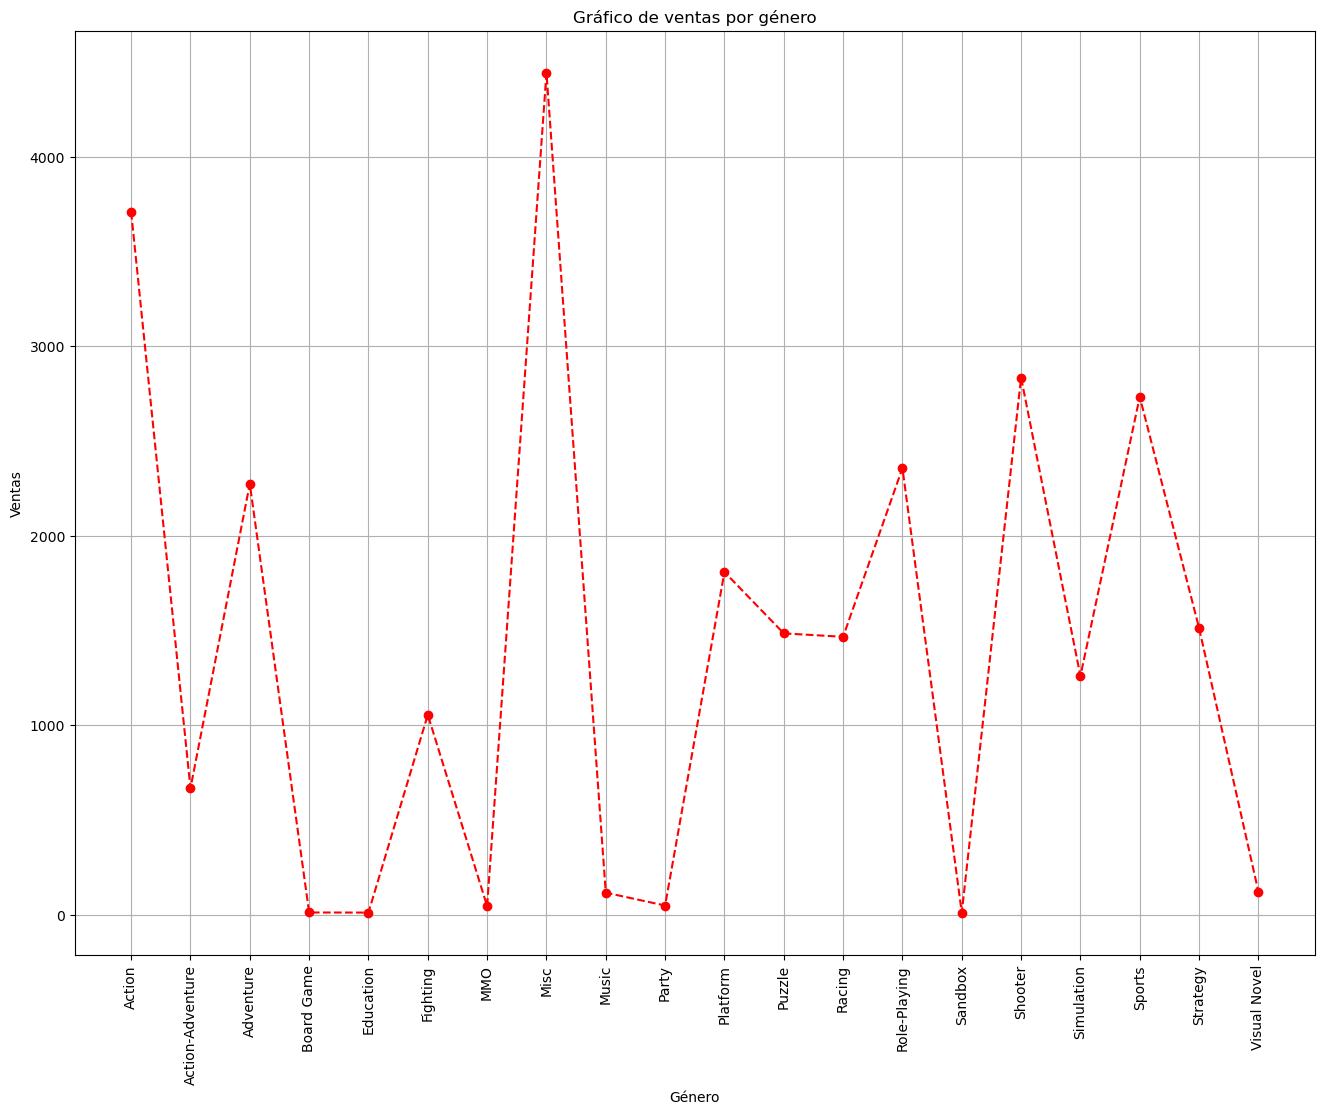

In [38]:
# creacion del grafico
x = vg_sales_grouped_by_genre['genre']
sales = vg_sales_grouped_by_genre['total_sales'].sum()

plt.figure(figsize=(16, 12))

plt.plot(sales, linestyle='--', color='r', marker='o')
plt.title('Gráfico de ventas por género')
plt.xlabel('Género')
plt.ylabel("Ventas")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

En el gráfico de ventas por género se observa que la categoría más vendida es del género "misc", seguido de "action". Los géneros con menores ventas o los videojuegos en la categoria de "board game", "educacion", "music" y "sandbox"

### **3.2. Gráfico de ventas por plataforma**

In [39]:
vg_sales_grouped_by_console = vg_sales.groupby(['console'])
vg_sales_grouped_by_console.head(10)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.400000,20.320000,6.37000,0.990000,9.850000,3.120000,2013-09-17,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.700000,19.390000,6.06000,0.600000,9.710000,3.020000,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.600000,16.150000,8.41000,0.470000,5.490000,1.780000,2002-10-28,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,6.831008,15.860000,9.06000,0.060000,5.330000,1.420000,2013-09-17,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.100000,15.090000,6.18000,0.410000,6.050000,2.440000,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53963,Point of Destruction,GIZ,Shooter,Gizmondo Studios,Gizmondo Studios Manchester,7.276800,0.559534,0.26474,0.102281,0.149472,0.043041,2005-10-22,2005-10-22
54954,Zombie Panic in Wonderland,S32X,Shooter,Akaoni Studio,Akaoni Studio,7.276800,0.559534,0.26474,0.102281,0.149472,0.043041,2012-03-01,2012-03-01
58090,Ski Crazed,ApII,Sports,Baudville,Naughty Dog,7.291027,0.559534,0.26474,0.102281,0.149472,0.043041,1987-10-01,2022-09-30
58932,Hockey Rage 2005,GIZ,Sports,Fathammer,Pixelgene,7.291027,0.559534,0.26474,0.102281,0.149472,0.043041,2005-10-12,2005-10-12


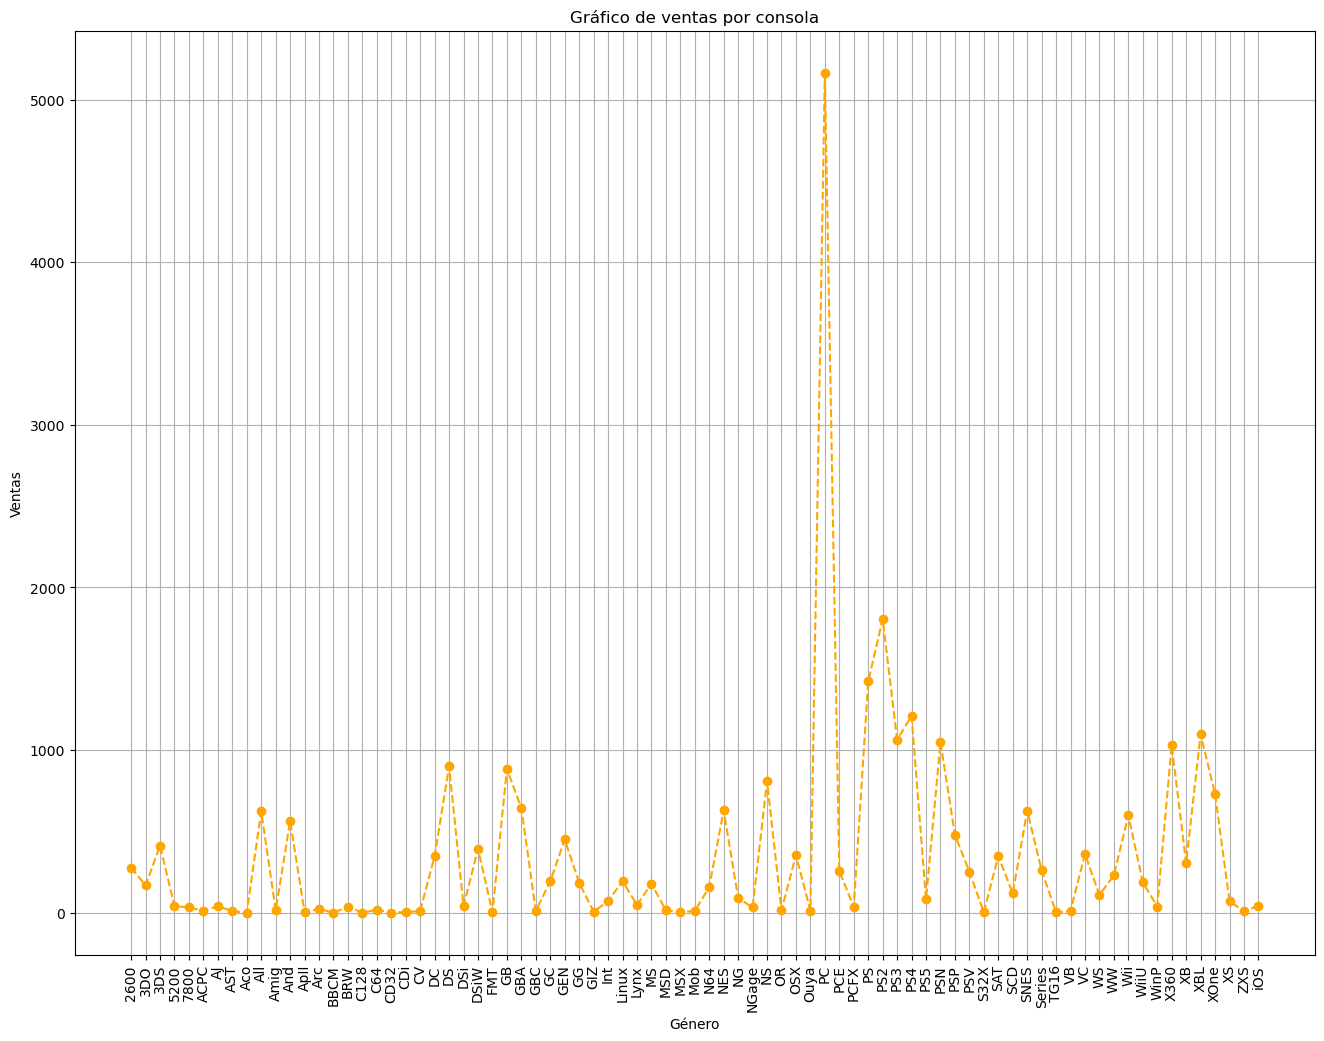

In [40]:
# creacion del grafico
x = vg_sales_grouped_by_console['console']
sales = vg_sales_grouped_by_console['total_sales'].sum()

plt.figure(figsize=(16, 12))

plt.plot(sales, linestyle='--', color='orange', marker='o')
plt.title('Gráfico de ventas por consola')
plt.xlabel('Género')
plt.ylabel("Ventas")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

En el gráfico se observa que las mayores ventas de videojuegos se hacen para PC, seguido de ps3.

### **3.3. Gráfico de ventas por género** 

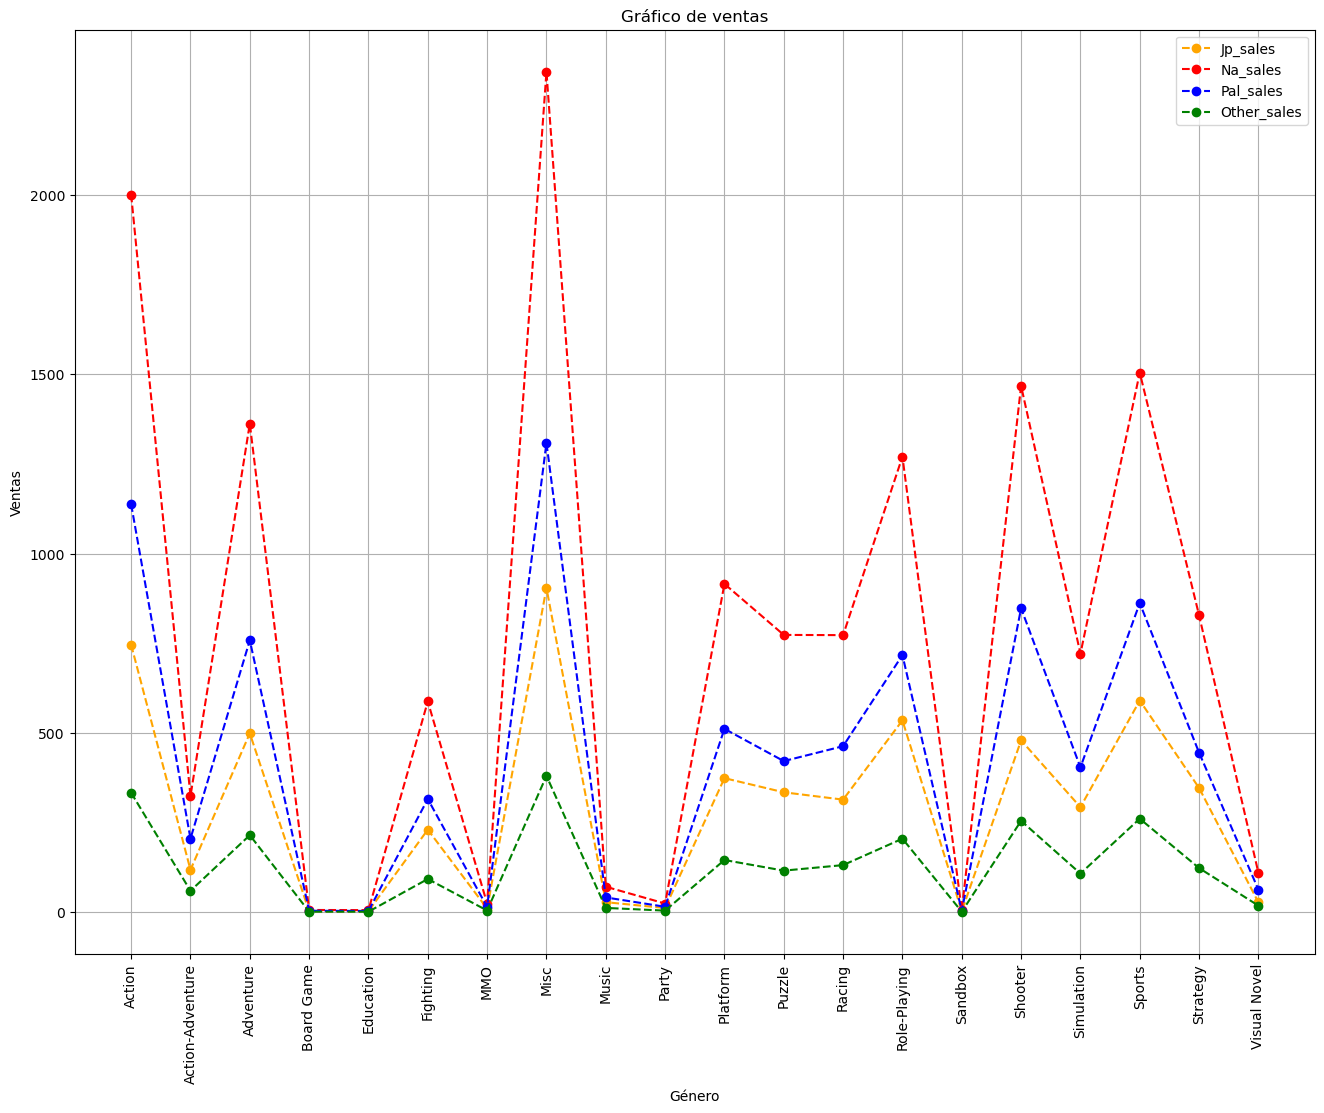

In [41]:
jp_sales = vg_sales_grouped_by_genre['jp_sales'].sum()
na_sales = vg_sales_grouped_by_genre['na_sales'].sum()
pal_sales = vg_sales_grouped_by_genre['pal_sales'].sum()
other_sales = vg_sales_grouped_by_genre['other_sales'].sum()

plt.figure(figsize=(16, 12))

plt.plot(jp_sales, label="Jp_sales" , linestyle='--', color='orange', marker='o')
plt.plot(na_sales, label="Na_sales", linestyle='--', color='red', marker='o')
plt.plot(pal_sales, label="Pal_sales", linestyle='--', color='blue', marker='o')
plt.plot(other_sales, label="Other_sales", linestyle='--', color='green', marker='o')
plt.title('Gráfico de ventas')
plt.legend()
plt.xlabel('Género')
plt.ylabel("Ventas")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

En el gráfico se observan las ventas de cada pais en cada categoria. Se nota una distribuición similar en cada venta, muy probablemente esto se deba a que los valores faltantes fueron rellenados con la media, por lo que hay una razón constante con cada uno de ellos. 

***Cabe destacar que hay otros métodos para rellenar los valores en datasets, por ejemplo: promedio acotado, técnica del vecino o de logaritmo natural y se utiliza cada uno dependiendo del análisis estadístico previo, por lo tanto, para este dataset probablemente otro método sea el adecuado.***

### **3.4. Gráfico de ventas por consola**

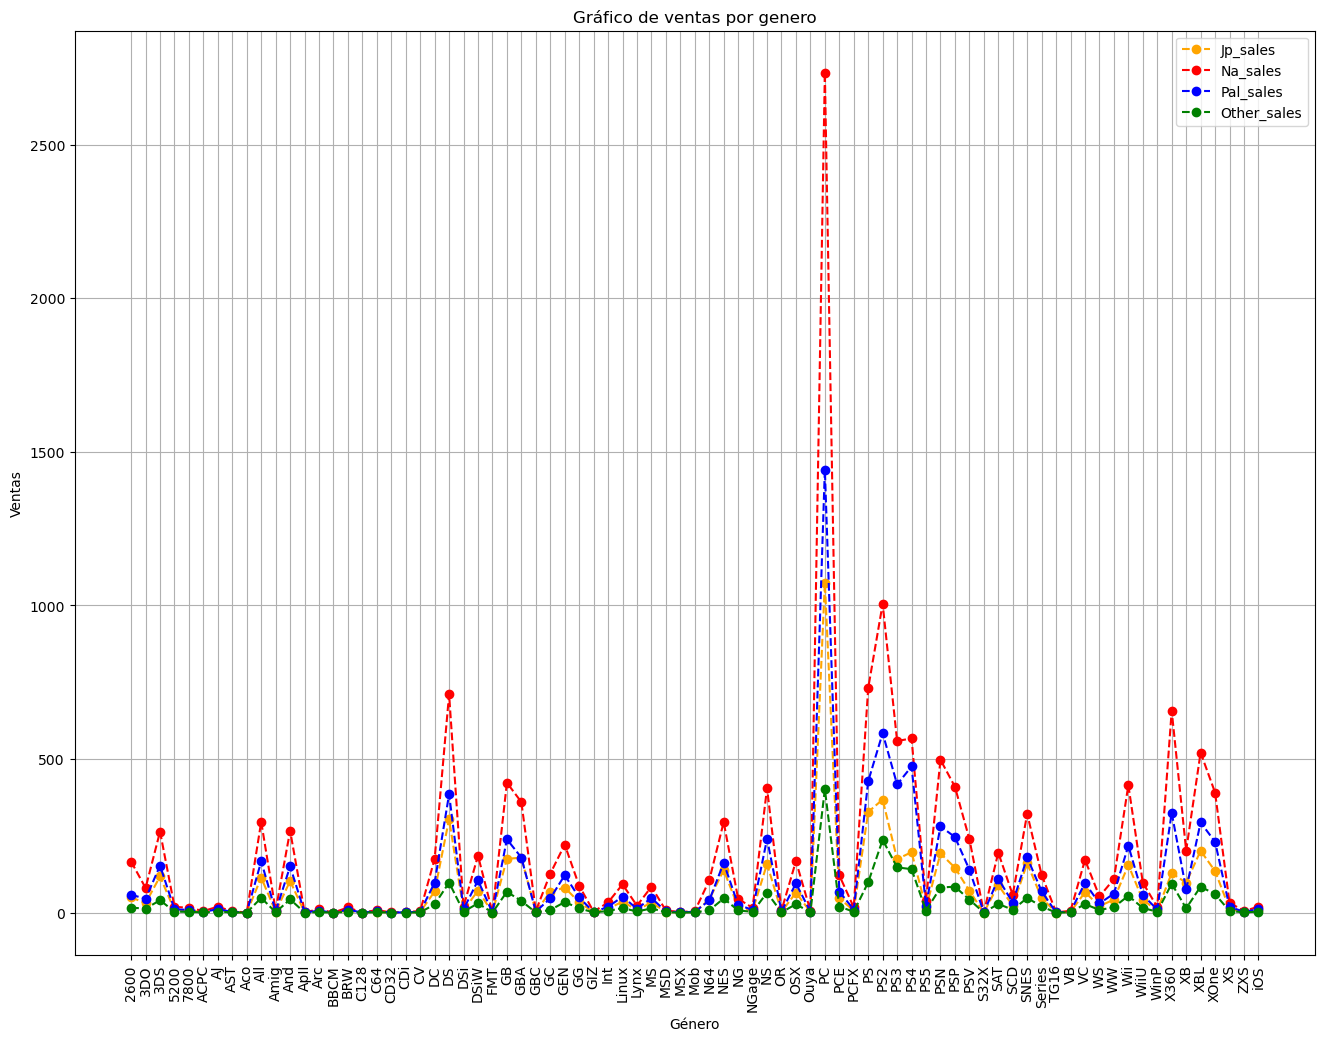

In [42]:
jp_sales = vg_sales_grouped_by_console['jp_sales'].sum()
na_sales = vg_sales_grouped_by_console['na_sales'].sum()
pal_sales = vg_sales_grouped_by_console['pal_sales'].sum()
other_sales = vg_sales_grouped_by_console['other_sales'].sum()

plt.figure(figsize=(16, 12))

plt.plot(jp_sales, label="Jp_sales" , linestyle='--', color='orange', marker='o')
plt.plot(na_sales, label="Na_sales", linestyle='--', color='red', marker='o')
plt.plot(pal_sales, label="Pal_sales", linestyle='--', color='blue', marker='o')
plt.plot(other_sales, label="Other_sales", linestyle='--', color='green', marker='o')
plt.title('Gráfico de ventas por genero')
plt.legend()
plt.xlabel('Género')
plt.ylabel("Ventas")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Al igual que el gráfico anterior, los datos tienen una distribución similar debido a que se consideró la media como valor de relleno de datos faltantes.

### **4. Análisis adicional**

### **4.1. Estadística descriptiva del dataset**

In [43]:
# estadistica descriptiva del dataset
vg_sales.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000,57088.000000
mean,7.188632,0.489789,0.264740,0.102281,0.149472,0.043041
std,0.565210,0.475300,0.232785,0.057940,0.186095,0.065191
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.884593,0.350000,0.264740,0.102281,0.149472,0.043041
50%,7.276800,0.559534,0.264740,0.102281,0.149472,0.043041
75%,7.341058,0.559534,0.264740,0.102281,0.149472,0.043041
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


### **4.2. Análisis de correlación**

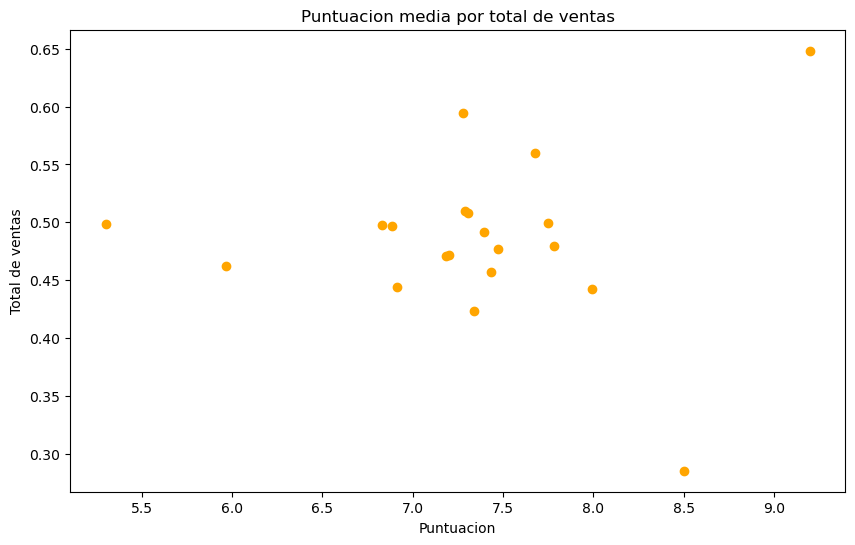

In [44]:
# correlacion entre el critic score y ventas
x = vg_sales_grouped_by_genre['total_sales'].mean()
score = vg_sales_grouped_by_genre['critic_score'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(score, x, color='orange', marker='o')

plt.title('Puntuacion media por total de ventas')
plt.xlabel('Puntuacion')
plt.ylabel('Total de ventas')
plt.show()

En el gráfico se logra observar que existe correlación entre las puntuaciones y el total de ventas. La correlación más fuerte se da para las puntuaciones cercanas a 7.5

### **4.3. Regresion lineal**

La siguiente porción de código fue escrita utilizando el material de la clase, chat gpt y la documentación de scikit learn https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html

In [45]:
# importacion de scktlearn
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder as Encoder

encoder = Encoder()
vg_sales['index'] = encoder.fit_transform(vg_sales['title'])

# datos
x = np.array(vg_sales['index']).reshape(-1, 1)
y = np.array(vg_sales['total_sales'])

model_sales = LinearRegression().fit(x, y)

predict_sales = model_sales.predict(x)

In [46]:
# conversion de los resultados a dataframe
predictions_sales = pd.DataFrame({
    'Title': vg_sales['title'],
    'Predicted Sales': predict_sales
})

# impresion del dataframe
print(predictions_sales)

                                 Title  Predicted Sales
0                   Grand Theft Auto V         0.495307
1                   Grand Theft Auto V         0.495307
2          Grand Theft Auto: Vice City         0.495297
3                   Grand Theft Auto V         0.495307
4            Call of Duty: Black Ops 3         0.502768
...                                ...              ...
64010               World End Syndrome         0.473488
64011            XBlaze Lost: Memories         0.473256
64012                     Yoru, Tomosu         0.473026
64013                     Yoru, Tomosu         0.473026
64014  Yunohana SpRING! ~Mellow Times~         0.472857

[57088 rows x 2 columns]


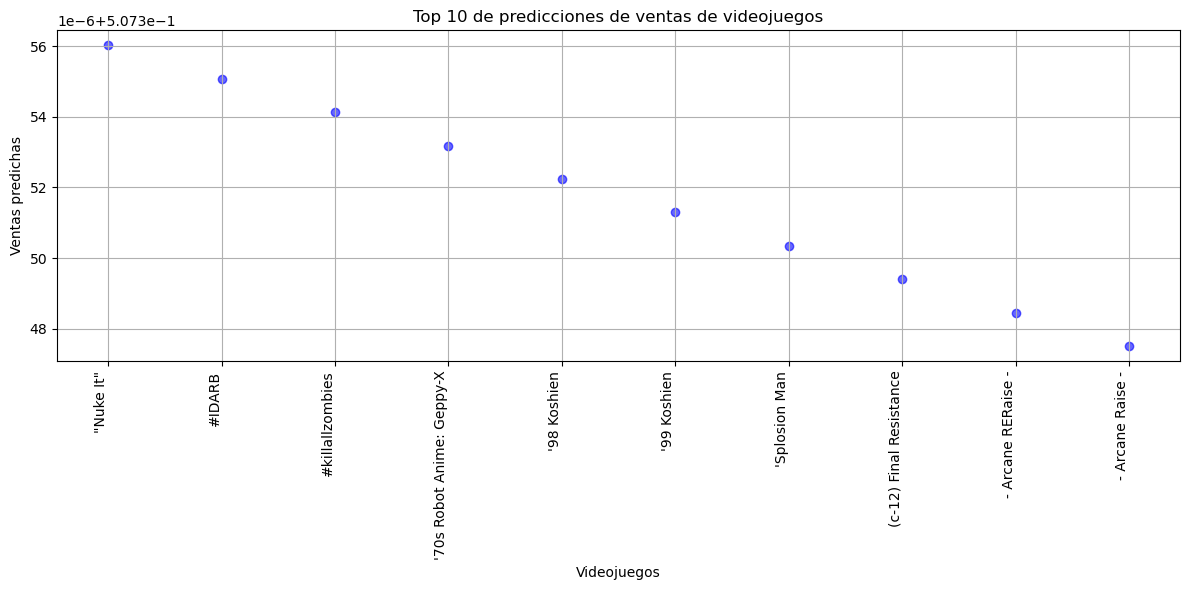

In [47]:
# reducir el dataframe al top 10
top_10 = predictions_sales.nlargest(10, 'Predicted Sales')

# tamaño del gráfico
plt.figure(figsize=(12, 6))

# se grafica los videojuegos con sus ventas predichas
plt.scatter(top_10['Title'], top_10['Predicted Sales'], color='blue', alpha=0.6)

# configuraciones del gráfico
plt.title('Top 10 de predicciones de ventas de videojuegos')
plt.xlabel('Videojuegos')
plt.ylabel('Ventas predichas')
plt.xticks(rotation=90, ha='right')
plt.grid(True)  

# mostrar el gráfico
plt.tight_layout()
plt.show()